In [1]:
import market as mkt

import warnings
warnings.filterwarnings(action='ignore') #default
import pyfolio as pf
import pandas as pd

In [2]:
def buy_portfolio(portfolio, df):
    assets = 100000000
    start = '2020-01-03'

    ratios = portfolio.Ratio
    assert sum(ratios)<=100, 'Can\'t be sum of ratio > 100' 
    
    ratios = assets * ratios /100
    s_qty = (ratios.to_numpy()/df.loc[df.index == start][portfolio.Name].to_numpy())[0]
    s_qty = [int(q) for q in s_qty]

    ret_df = df.drop('USD/KRW',axis=1)*s_qty
    ret_df = ret_df.sum(axis=1)

    ret_df = ret_df.iloc[::-1]
    return ret_df

In [7]:
def staticAA(yaml_name:str='AW4_11'):
    portfolio = mkt.get_etf_from_yaml(yaml_name)
    df = mkt.get_df_from_yaml(yaml_name)
    ret_df = buy_portfolio(portfolio, df)
    ret_df = ret_df.pct_change().fillna(0)
    return ret_df

Start date,2012-10-06
End date,2022-09-30
Total months,173
,Backtest
Annual return,3.068%
Cumulative returns,54.863%
Annual volatility,11.025%
Sharpe ratio,0.33
Calmar ratio,0.16
Stability,0.85
Max drawdown,-18.778%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,18.78,2012-10-07,2014-05-19,2016-02-18,879
1,10.44,2020-02-23,2020-03-16,2020-04-16,39
2,10.37,2020-09-01,2020-12-09,2021-07-14,227
3,8.28,2021-11-09,2022-06-13,2022-08-16,201
4,8.18,2016-02-29,2016-10-11,2017-09-05,397


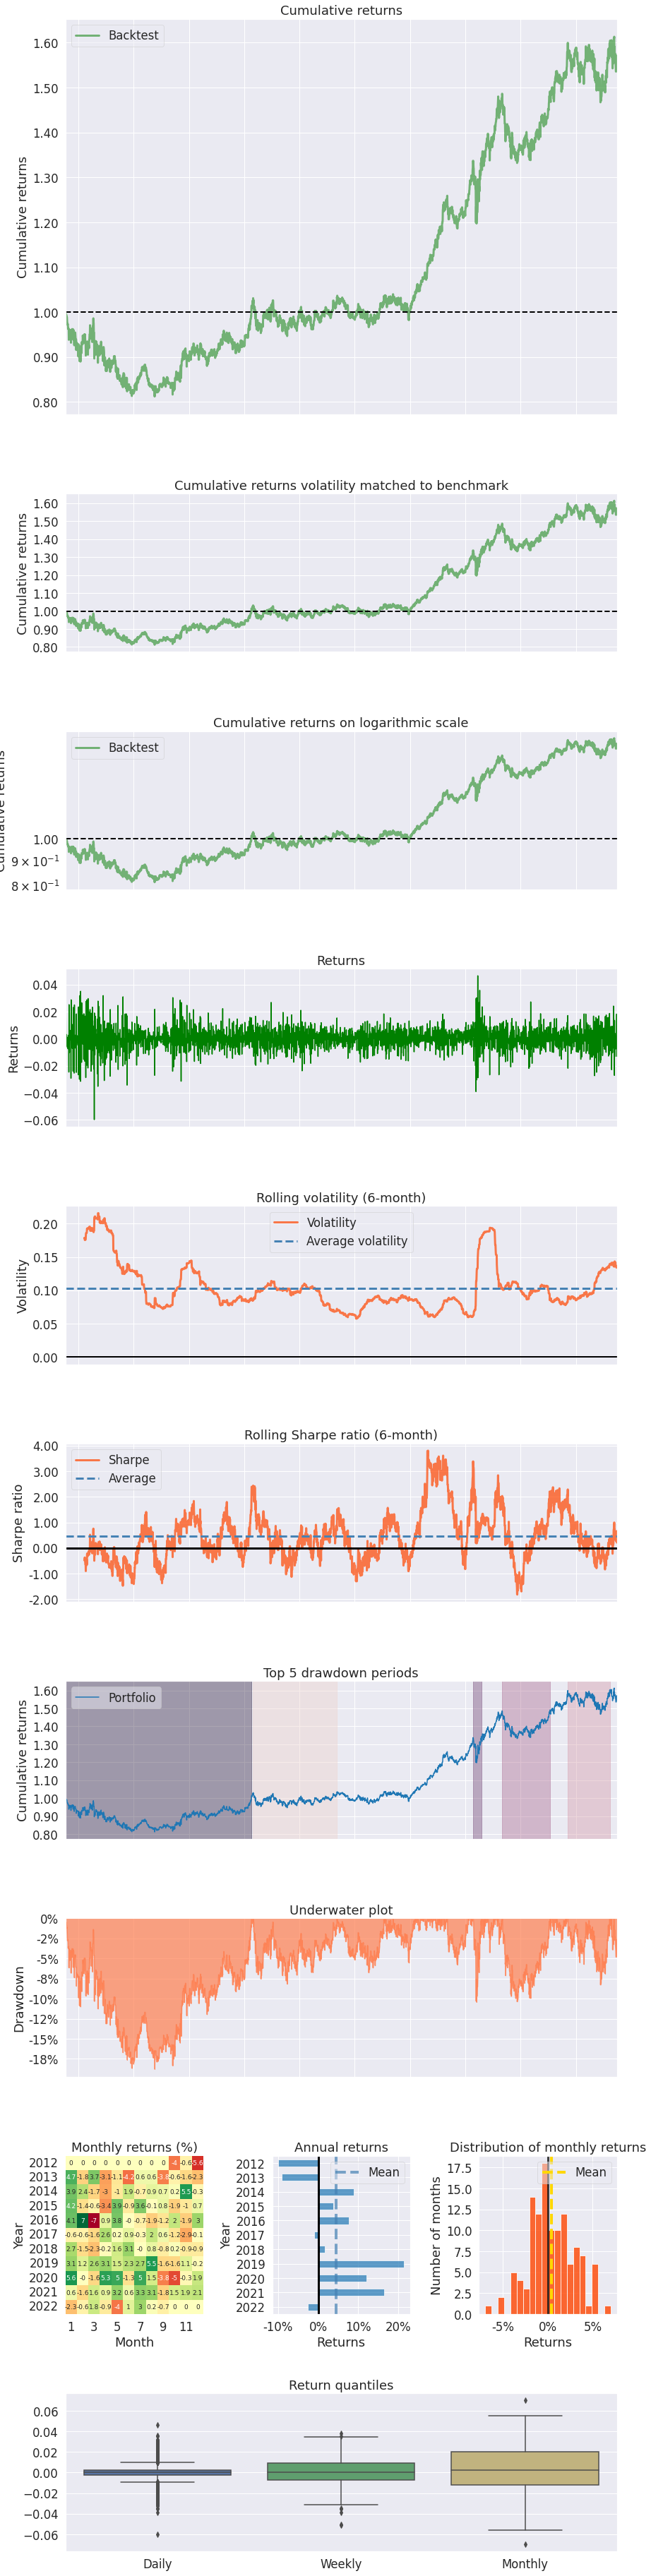

In [8]:
ret_df = staticAA('AW4_11')
pf.create_returns_tear_sheet(ret_df)